In [1]:
from google.colab import drive
from google.colab import files

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

# Try specifying the delimiter explicitly
df = pd.read_csv("/content/drive/MyDrive/CrimeDesc.csv")


df.head()

,date,primary_type,description
0,2001-01-01,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER
1,2001-01-01,CRIMINAL DAMAGE,TO VEHICLE
2,2001-01-01,CRIMINAL DAMAGE,TO VEHICLE
3,2001-01-01,NARCOTICS,POSS: CANNABIS 30GMS OR LESS
4,2001-01-01,THEFT,OVER $500


In [4]:
df1 = pd.read_csv("/content/drive/MyDrive/CrimeDate.csv")
df1.head()
print("Total Number of Crimes in DataFrame 1")
print(len(df1))

Total Number of Crimes in DataFrame 1
141855


In [5]:
df2 = pd.read_csv("/content/drive/MyDrive/CrimeLocation.csv")
df2.head()

,year,district,latitude,longitude,primary_type,crime_count
0,2001,6.0,41.726587,-87.628651,OTHER OFFENSE,1.0
1,2001,6.0,41.743292,-87.601517,ROBBERY,1.0
2,2001,7.0,41.784650,-87.665708,ASSAULT,2.0
3,2001,24.0,42.016182,-87.666751,ROBBERY,1.0
4,2001,10.0,41.861352,-87.694551,BATTERY,5.0


In [6]:
len(df1["primary_type"].unique())

34

In [7]:
print("Total Count of Crimes of different Primary types from DataFrame 1")
df1["primary_type"].value_counts()

Total Count of Crimes of different Primary types from DataFrame 1


,count
primary_type,
BATTERY,7835
NARCOTICS,7832
ASSAULT,7831
WEAPONS VIOLATION,7823
THEFT,7821
OTHER OFFENSE,7807
CRIMINAL TRESPASS,7791
CRIMINAL DAMAGE,7730
ROBBERY,7252


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Barchart of Crimes of different Primary types

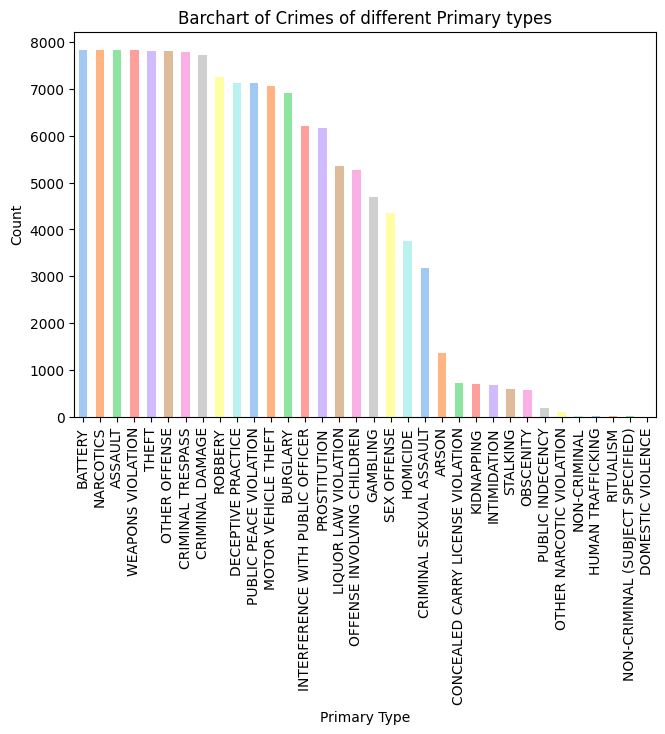

In [9]:
import matplotlib.pyplot as plt
colors = sns.color_palette("pastel")
df1["primary_type"].value_counts().plot(kind="bar", figsize=(7.5, 5), color=colors)
plt.title("Barchart of Crimes of different Primary types")
plt.xlabel("Primary Type")
plt.ylabel("Count")
plt.show()


# Histogram of Crimes From Year 2001-2005

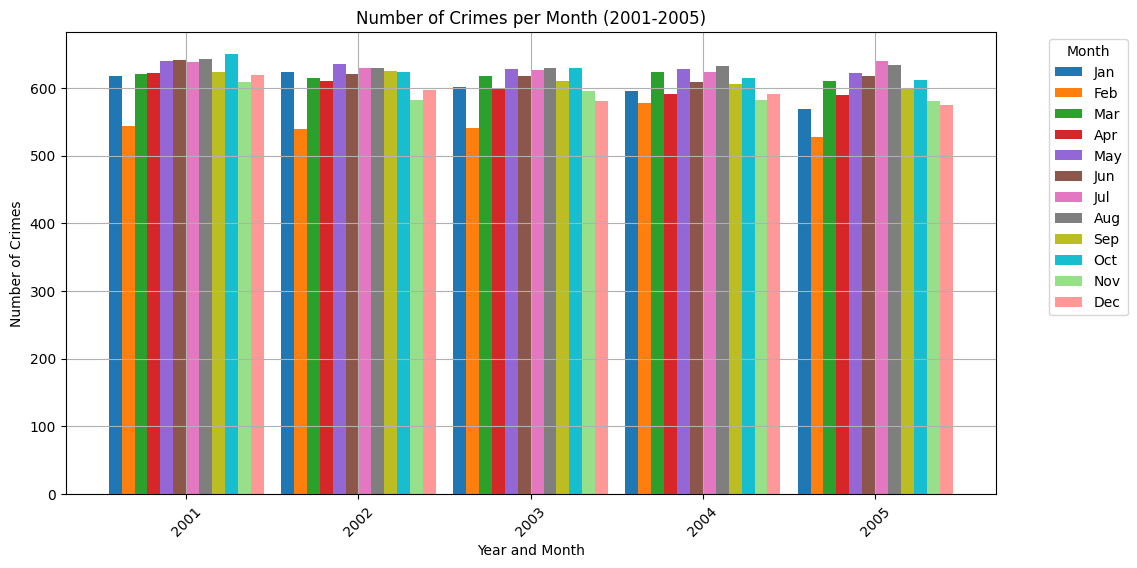

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/CrimeDate.csv")

df['date'] = pd.to_datetime(df['date'])

filtered_df = df[(df['date'].dt.year >= 2001) & (df['date'].dt.year <= 2005)]

monthly_crime_counts = filtered_df.groupby([filtered_df['date'].dt.year, filtered_df['date'].dt.month])['primary_type'].count().unstack()
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467d6", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",  "#98df8a", "#ff9896"]
monthly_crime_counts.plot(kind='bar', figsize=(12, 6),width=0.9,color = colors)
plt.title('Number of Crimes per Month (2001-2005)')
plt.xlabel('Year and Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Month', labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)


# Line Plot

Line Plot of Total Crimes per Year


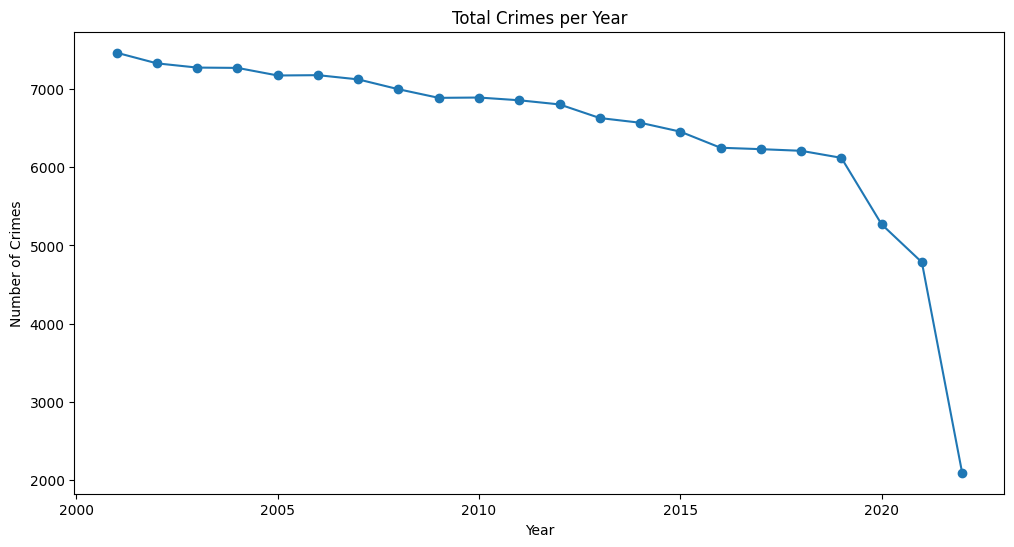

In [11]:
df = pd.read_csv("/content/drive/MyDrive/CrimeDate.csv")

df['date'] = pd.to_datetime(df['date'])

total_crimes_per_year = df.groupby(df['date'].dt.year)['primary_type'].count()
print("Line Plot of Total Crimes per Year")
total_crimes_per_year.plot(kind='line', figsize=(12, 6),marker = 'o')
plt.title('Total Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()


# Stacked Area Chart of Crime Trends by Type Over Time in Chicago

<Figure size 1200x1200 with 0 Axes>

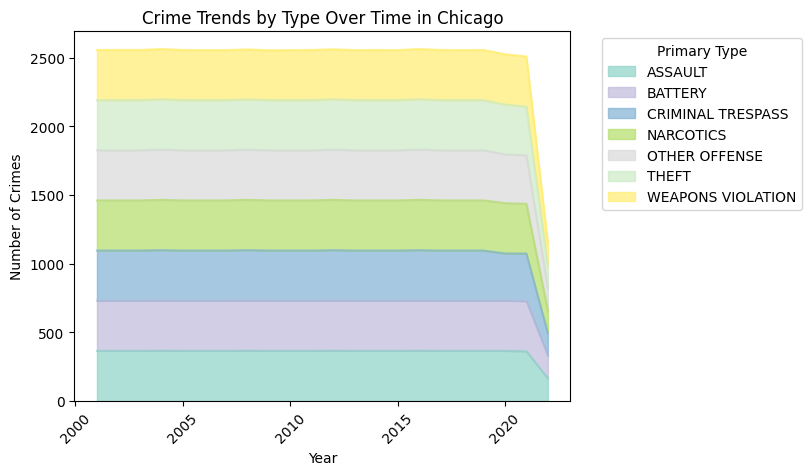

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("/content/drive/MyDrive/CrimeDate.csv")
df['date'] = pd.to_datetime(df['date'], errors='coerce')


df = df.dropna(subset=['date'])


df['Year'] = df['date'].dt.year

top_crime_types = df['primary_type'].value_counts().nlargest(7).index
df_top_crimes = df[df['primary_type'].isin(top_crime_types)]

crime_trends = df_top_crimes.groupby(['Year', 'primary_type']).size().unstack(fill_value=0)

plt.figure(figsize=(12,12))
crime_trends.plot(kind='area', stacked=True, colormap='Set3', alpha=0.7)

plt.title("Crime Trends by Type Over Time in Chicago")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.legend(title="Primary Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)

plt.show()


# Top Crime Types to Prioritize Based on Pareto Analysis

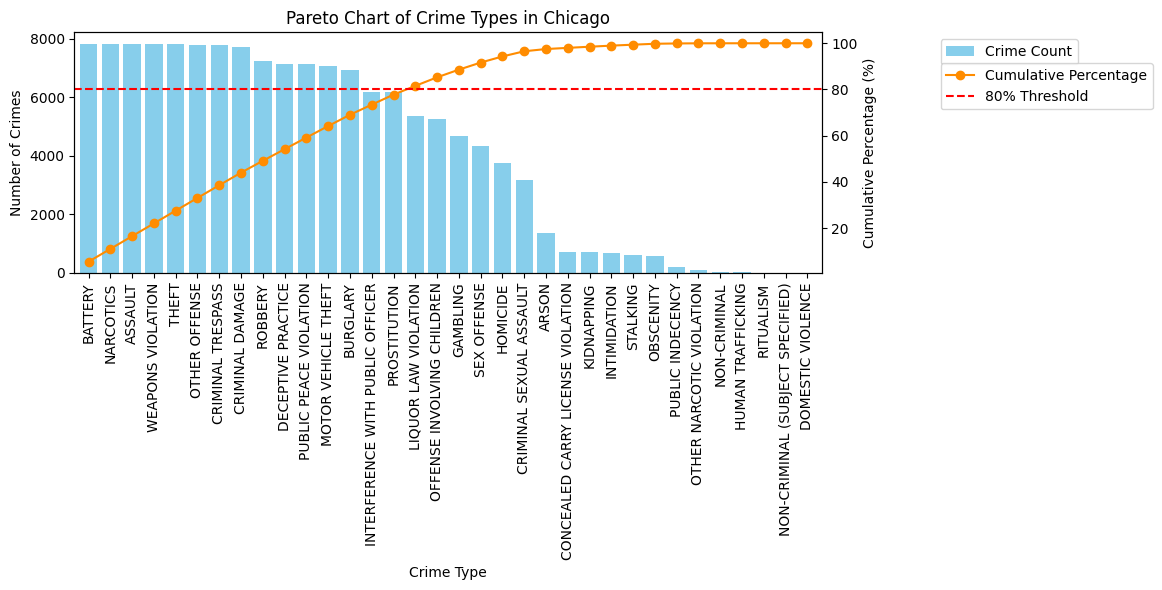

In [13]:
df = pd.read_csv("/content/drive/MyDrive/CrimeDate.csv")
crime_counts = df['primary_type'].value_counts()
crime_counts = crime_counts.sort_values(ascending=False)
cumulative_percentage = crime_counts.cumsum() / crime_counts.sum() * 100

fig, ax1 = plt.subplots(figsize=(12, 6))

crime_counts.plot(kind='bar', color='skyblue', ax=ax1, width=0.8, label="Crime Count")
ax1.set_ylabel('Number of Crimes')
ax1.set_title("Pareto Chart of Crime Types in Chicago")
ax1.set_xlabel("Crime Type")
ax2 = ax1.twinx()
cumulative_percentage.plot(color='darkorange', marker='o', ax=ax2, label="Cumulative Percentage")
ax2.set_ylabel('Cumulative Percentage (%)')
ax2.axhline(80, color='red', linestyle='--', label="80% Threshold")

ax1.legend(loc="upper left", bbox_to_anchor=(1.15, 1))
ax2.legend(loc="upper left", bbox_to_anchor=(1.15, 0.9))

plt.tight_layout()

plt.show()

# Box plot representing distribution of crime occurrences per year

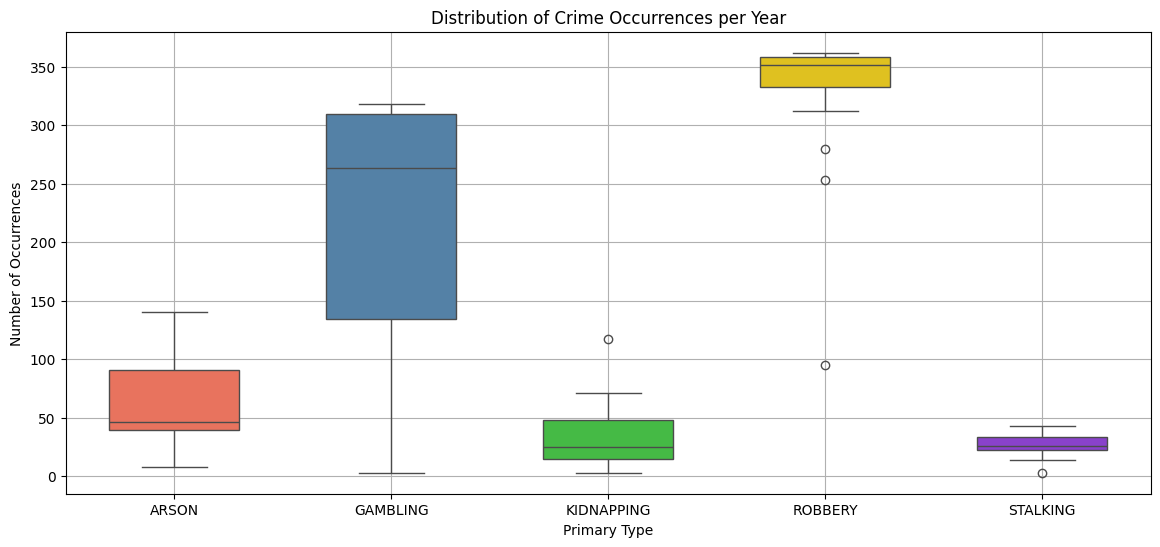

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])
filtered_data = df[df['primary_type'].isin(['ROBBERY', 'STALKING', 'ARSON', 'GAMBLING', 'KIDNAPPING'])]

yearly_counts = filtered_data.groupby([filtered_data['date'].dt.year, 'primary_type']).size().reset_index(name='count')
yearly_counts = yearly_counts.rename(columns={'date': 'year'})

palette = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2']

plt.figure(figsize=(14, 6))
sns.boxplot(x='primary_type', y='count', data=yearly_counts, palette=palette, width=0.6, hue='primary_type', legend=False)
plt.title('Distribution of Crime Occurrences per Year')
plt.xlabel('Primary Type')
plt.ylabel('Number of Occurrences')
plt.grid(True)
plt.show()


# Pie Chart depicting Distribution of Selected Crime Types in Chicago

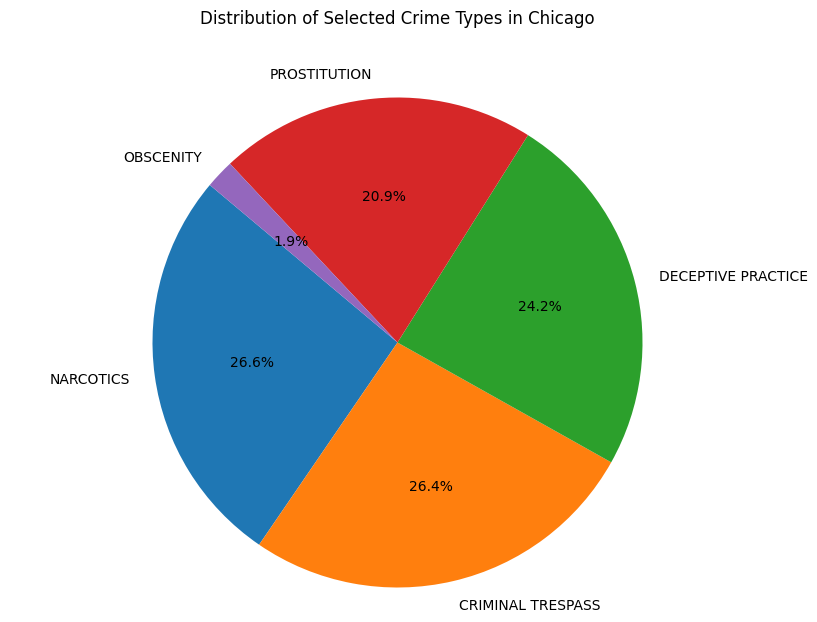

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/CrimeDate.csv")


crime_types = ['CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE', 'OBSCENITY', 'PROSTITUTION', 'NARCOTICS']
filtered_data = df[df['primary_type'].isin(crime_types)]


crime_counts = filtered_data['primary_type'].value_counts()

plt.figure(figsize=(10, 7))
plt.pie(crime_counts, labels=crime_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Selected Crime Types in Chicago\n\n')
plt.axis('equal')
plt.show()


# Crime severity distribution using funnel chart

In [16]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("/content/drive/MyDrive/CrimeDate.csv")

df['severity'] = df['primary_type'].map({
    'THEFT': 'Moderate',
    'BATTERY': 'Severe',
    'ASSAULT': 'Severe',
    'CRIMINAL DAMAGE': 'Moderate',
    'NARCOTICS': 'Severe',
    'BURGLARY': 'Severe',
    'MOTOR VEHICLE THEFT': 'Severe',
    'ROBBERY': 'Severe',
    'DECEPTIVE PRACTICE': 'Moderate',
    'WEAPONS VIOLATION': 'Severe',
    'CRIMINAL TRESPASS': 'Minor',
    'PUBLIC PEACE VIOLATION': 'Minor',
    'PROSTITUTION': 'Moderate',
    'OFFENSE INVOLVING CHILDREN': 'Severe',
    'SEX OFFENSE': 'Severe',
    'INTERFERENCE WITH PUBLIC OFFICER': 'Moderate',
    'ARSON': 'Severe',
    'GAMBLING': 'Minor',
    'LIQUOR LAW VIOLATION': 'Minor',
    'STALKING': 'Severe',
    'KIDNAPPING': 'Severe',
    'INTIMIDATION': 'Moderate',
    'OBSCENITY': 'Minor',
    'HUMAN TRAFFICKING': 'Severe',
    'OTHER OFFENSE': 'Moderate',
    'HOMICIDE': 'Severe',
    'CRIM SEXUAL ASSAULT': 'Severe',
    'CONCEALED CARRY LICENSE VIOLATION': 'Moderate',
    'NON-CRIMINAL': 'Minor',
    'RITUALISM': 'Minor'
})

severity_counts = df['severity'].value_counts().reset_index()
severity_counts.columns = ['Severity', 'Count']

fig = px.funnel(severity_counts, x='Count', y='Severity', title="Crime Incidents by Severity Level")


custom_colors = {
    'Severe': '#FF5733',
    'Moderate': '#FFC300',
    'Minor': '#DAF7A6'
}


fig.update_traces(marker=dict(color=[custom_colors[severity] for severity in severity_counts['Severity']]))


fig.show()


# Doughnut Chart Distribution of Selected Crime Types in Chicago

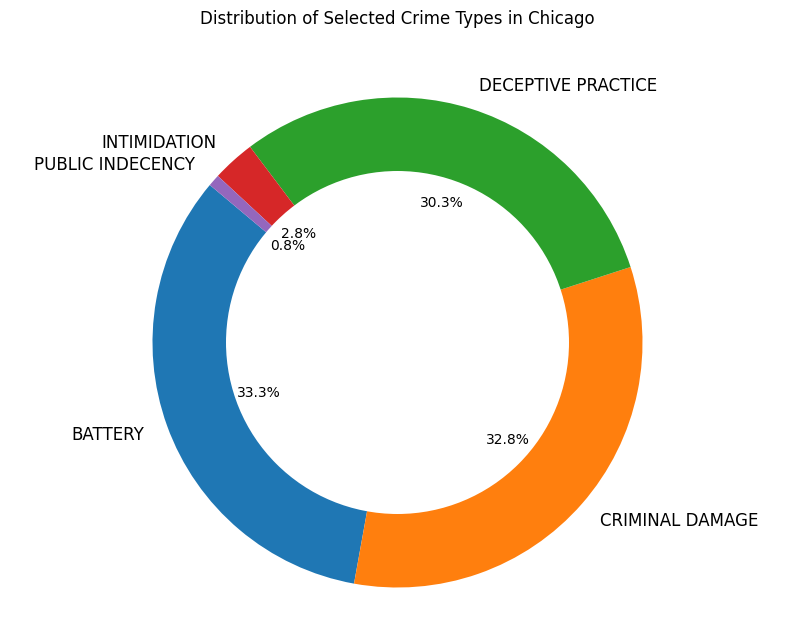

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/CrimeDate.csv")

crime_types = ['CRIMINAL DAMAGE', 'INTIMIDATION', 'DECEPTIVE PRACTICE', 'PUBLIC INDECENCY', 'BATTERY']
filtered_data = df[df['primary_type'].isin(crime_types)]

crime_counts = filtered_data['primary_type'].value_counts()

plt.figure(figsize=(10, 7))

wedges, texts, autotexts = plt.pie(crime_counts,
                                    autopct='%1.1f%%',
                                    startangle=140,
                                    labels=crime_counts.index)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.title('Distribution of Selected Crime Types in Chicago\n\n')

for text in texts:
    text.set_size(12)
    text.set_color('black')

plt.show()


# Violin Plot representing Distribution of Crime Occurrences per Year

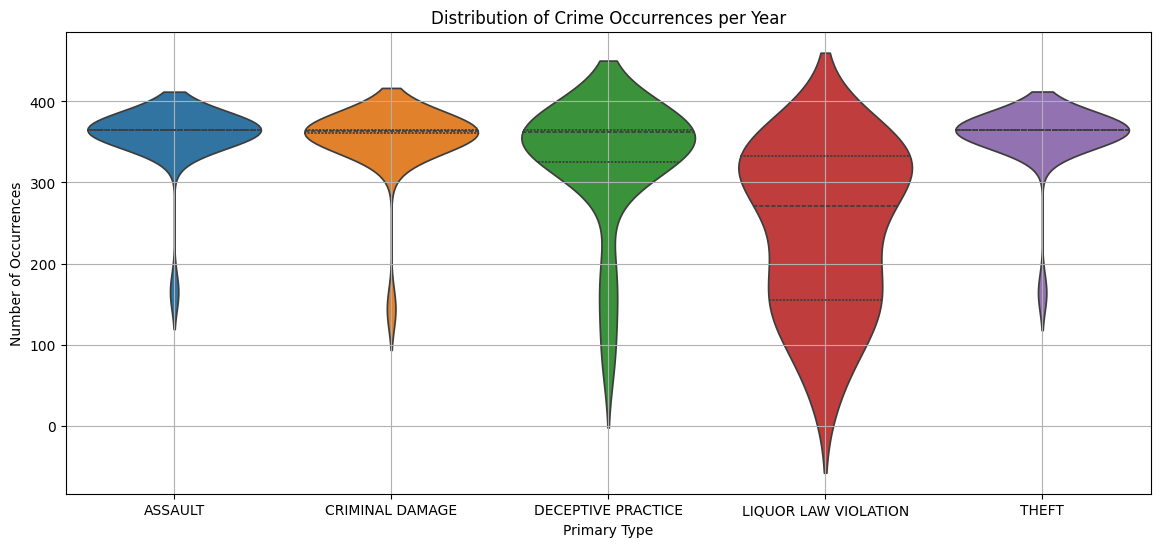

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/CrimeDate.csv")

df['date'] = pd.to_datetime(df['date'])
filtered_data = df[df['primary_type'].isin(['THEFT', 'CRIMINAL DAMAGE', 'ASSAULT', 'DECEPTIVE PRACTICE', 'LIQUOR LAW VIOLATION'])]

yearly_counts = filtered_data.groupby([filtered_data['date'].dt.year, 'primary_type']).size().reset_index(name='count')
yearly_counts = yearly_counts.rename(columns={'date': 'year'})

plt.figure(figsize=(14, 6))
sns.violinplot(x='primary_type', y='count', hue='primary_type', data=yearly_counts, inner='quartile', density_norm='area', legend=False)
plt.title('Distribution of Crime Occurrences per Year')
plt.xlabel('Primary Type')
plt.ylabel('Number of Occurrences')
plt.grid(True)
plt.show()


# Radar chart reprsenting crimes occured from 2010 to 2014

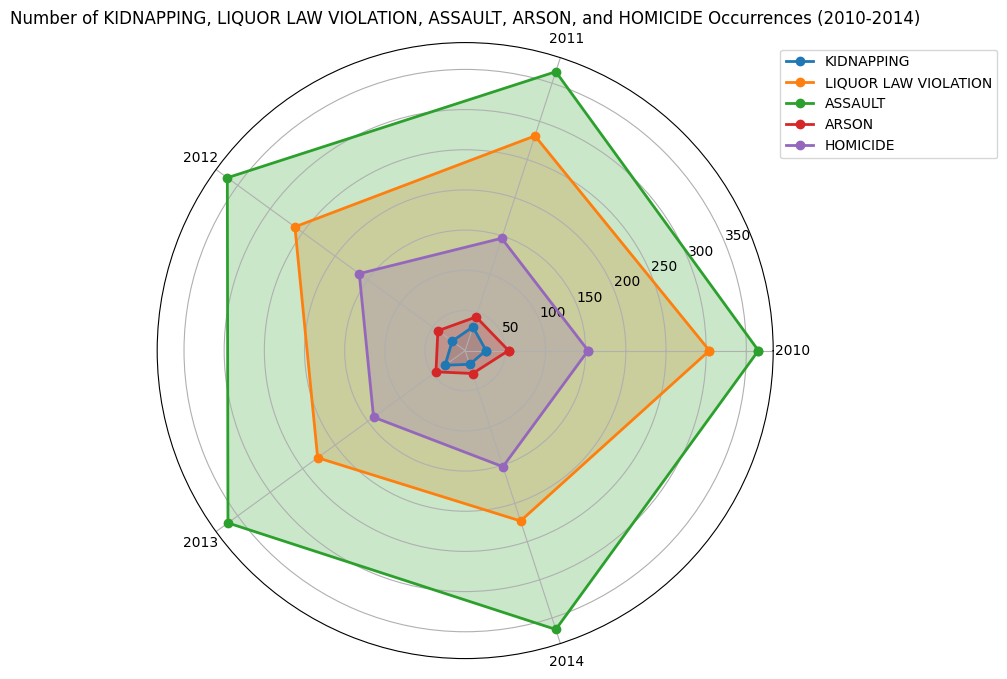

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/CrimeDate.csv")
df['date'] = pd.to_datetime(df['date'])

filtered_data = df[(df['primary_type'].isin(['KIDNAPPING', 'LIQUOR LAW VIOLATION', 'ASSAULT', 'ARSON', 'HOMICIDE'])) &
                    (df['date'].dt.year >= 2010) &
                    (df['date'].dt.year <= 2014)]

yearly_counts = filtered_data.groupby([filtered_data['date'].dt.year, 'primary_type']).size().unstack(fill_value=0)

if yearly_counts.empty:
    print("No data available for the specified years.")
else:
    years = yearly_counts.index.tolist()
    kidnapping_counts = yearly_counts['KIDNAPPING'].tolist()
    liquor_counts = yearly_counts['LIQUOR LAW VIOLATION'].tolist()
    assault_counts = yearly_counts['ASSAULT'].tolist()
    arson_counts = yearly_counts['ARSON'].tolist()
    homicide_counts = yearly_counts['HOMICIDE'].tolist()

    angles = np.linspace(0, 2 * np.pi, len(years), endpoint=False).tolist()
    kidnapping_counts += kidnapping_counts[:1]
    liquor_counts += liquor_counts[:1]
    assault_counts += assault_counts[:1]
    arson_counts += arson_counts[:1]
    homicide_counts += homicide_counts[:1]
    angles += angles[:1]

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, polar=True)

    ax.plot(angles, kidnapping_counts, 'o-', linewidth=2, label='KIDNAPPING')
    ax.fill(angles, kidnapping_counts, alpha=0.25)

    ax.plot(angles, liquor_counts, 'o-', linewidth=2, label='LIQUOR LAW VIOLATION')
    ax.fill(angles, liquor_counts, alpha=0.25)

    ax.plot(angles, assault_counts, 'o-', linewidth=2, label='ASSAULT')
    ax.fill(angles, assault_counts, alpha=0.25)

    ax.plot(angles, arson_counts, 'o-', linewidth=2, label='ARSON')
    ax.fill(angles, arson_counts, alpha=0.25)

    ax.plot(angles, homicide_counts, 'o-', linewidth=2, label='HOMICIDE')
    ax.fill(angles, homicide_counts, alpha=0.25)

    ax.set_thetagrids(np.degrees(angles[:-1]), years)
    ax.set_title('Number of KIDNAPPING, LIQUOR LAW VIOLATION, ASSAULT, ARSON, and HOMICIDE Occurrences (2010-2014)')

    # Move legend to the upper left outside the plot
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    ax.grid(True)

    plt.show()


# Scatter Plot for crime distribution in Different location of Chicago

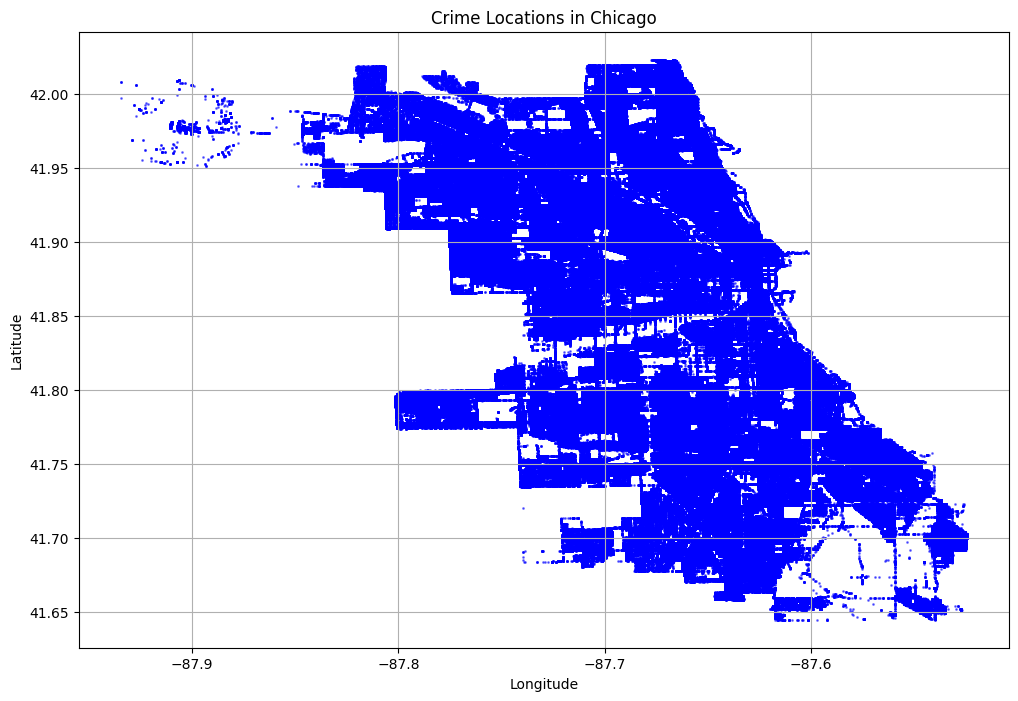

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/CrimeLocation.csv")

if 'longitude' in df.columns and 'latitude' in df.columns:
    crime_data = df[['longitude', 'latitude']]

    crime_data = crime_data.dropna(subset=['longitude', 'latitude'])

    plt.figure(figsize=(12, 8))
    plt.scatter(crime_data['longitude'], crime_data['latitude'], alpha=0.5, s=1, color='blue')
    plt.title('Crime Locations in Chicago')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid()
    plt.show()
else:
    print("Longitude and/or latitude columns are missing from the dataset.")


# Data Preprocessing Step

In [21]:
import pandas as pd
filepath=["/content/drive/MyDrive/CrimeDate.csv","/content/drive/MyDrive/CrimeDesc.csv","/content/drive/MyDrive/CrimeLocation.csv"]
df=pd.read_csv(filepath[0])
print("Checking missing values for CrimeDate file:")
missing_values1 = df.isnull().sum()
print(missing_values1)

df=pd.read_csv(filepath[1])
print("Checking missing values for CrimeDesc file:")
missing_values2 = df.isnull().sum()
print(missing_values2)
df2=df.dropna(subset=['description'], inplace=False)
print("Checking missing values for CrimeDesc file after removing rows containing missing values:")
missing_values2 = df2.isnull().sum()
print(missing_values2)
df=pd.read_csv(filepath[2])
print("Checking missing values for CrimeLocation file:")
missing_values3 = df.isnull().sum()
print(missing_values3)
df2=df.dropna(subset=['district'], inplace=False)
df2=df2.dropna(subset=['crime_count'], inplace=False)
df2=df2.dropna(subset=['primary_type'], inplace=False)
print("Checking missing values for CrimeLocation file after removing rows containing missing values:")
missing_values3 = df2.isnull().sum()
print(missing_values3)

Checking missing values for CrimeDate file:
date            0
primary_type    0
crime_count     0
arrest_count    0
false_count     0
dtype: int64
Checking missing values for CrimeDesc file:
date            0
primary_type    0
description     1
dtype: int64
Checking missing values for CrimeDesc file after removing rows containing missing values:
date            0
primary_type    0
description     0
dtype: int64
Checking missing values for CrimeLocation file:
year             0
district        45
latitude         0
longitude        0
primary_type     1
crime_count      1
dtype: int64
Checking missing values for CrimeLocation file after removing rows containing missing values:
year            0
district        0
latitude        0
longitude       0
primary_type    0
crime_count     0
dtype: int64


# Predective Analysis with Chicago Crime Dataset

## Applying Apriori Algorithm to find Frequent Itemsets and Association Rules

In [22]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import time

dataset=pd.read_csv("/content/drive/MyDrive/CrimeDate.csv")

dataset=dataset[["date","primary_type"]]
dataset=dataset.dropna()

transaction_data=dataset.groupby("date")["primary_type"].apply(list).reset_index(name='Crimes')
transactions=transaction_data["Crimes"].tolist()

transaction_encoder = TransactionEncoder()
transaction_array = transaction_encoder.fit(transactions).transform(transactions).astype("int")

transaction_dataframe = pd.DataFrame(transaction_array, columns=transaction_encoder.columns_)

start_time = time.time()
freuent_itemsets=apriori(transaction_dataframe,min_support=0.99, use_colnames=True)
end_time = time.time()

print("Length of Frequent Itemsets is:")
print(len(freuent_itemsets))
print("The frequent itemsets are:")
print(freuent_itemsets.head())
association_rules_df=association_rules(freuent_itemsets, metric="confidence", min_threshold=0.5,num_itemsets=len(freuent_itemsets))

print("Length of Association Rules is:")
print(len(association_rules_df))
print("The association rules are:")
print(association_rules_df.head())

print("Time taken to find frequent itemsets by Apriori Algorithm:", end_time - start_time, "seconds")

Length of Frequent Itemsets is:
103
The frequent itemsets are:
    support             itemsets
0  0.999489            (ASSAULT)
1  1.000000            (BATTERY)
2  0.994384  (CRIMINAL TRESPASS)
3  0.999617          (NARCOTICS)
4  0.996426      (OTHER OFFENSE)
Length of Association Rules is:
1116
The association rules are:
           antecedents          consequents  antecedent support  \
0            (BATTERY)            (ASSAULT)            1.000000   
1            (ASSAULT)            (BATTERY)            0.999489   
2  (CRIMINAL TRESPASS)            (ASSAULT)            0.994384   
3            (ASSAULT)  (CRIMINAL TRESPASS)            0.999489   
4          (NARCOTICS)            (ASSAULT)            0.999617   

   consequent support   support  confidence      lift  representativity  \
0            0.999489  0.999489    0.999489  1.000000               1.0   
1            1.000000  0.999489    1.000000  1.000000               1.0   
2            0.999489  0.994001    0.999615  1.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning:

invalid value encountered in divide



## FpGrowth Algorithm

In [23]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules
import pandas as pd
import time
dataset=pd.read_csv("/content/drive/MyDrive/CrimeDate.csv")

dataset=dataset[["date","primary_type"]]
dataset=dataset.dropna()

transaction_data=dataset.groupby("date")["primary_type"].apply(list).reset_index(name='Crimes')
transactions=transaction_data["Crimes"].tolist()

transaction_encoder = TransactionEncoder()
transaction_array = transaction_encoder.fit(transactions).transform(transactions)

transaction_dataframe = pd.DataFrame(transaction_array, columns=transaction_encoder.columns_)
start_time = time.time()
fre = fpgrowth(transaction_dataframe, min_support = 0.99, use_colnames = True)
end_time = time.time()

print("Length of Frequent Itemsets is:")
print(len(freuent_itemsets))
print("The frequent itemsets are:")
print(freuent_itemsets.head())

ar_df = association_rules(fre, metric = "confidence", min_threshold = 0.5, support_only = False,num_itemsets=len(freuent_itemsets))

print("Length of Association Rules is:")
print(len(association_rules_df))
print("The association rules are:")
print(association_rules_df.head())

print("Time taken to find frequent itemsets by FpGrowth:", end_time - start_time, "seconds")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Length of Frequent Itemsets is:
103
The frequent itemsets are:
    support             itemsets
0  0.999489            (ASSAULT)
1  1.000000            (BATTERY)
2  0.994384  (CRIMINAL TRESPASS)
3  0.999617          (NARCOTICS)
4  0.996426      (OTHER OFFENSE)
Length of Association Rules is:
1116
The association rules are:
           antecedents          consequents  antecedent support  \
0            (BATTERY)            (ASSAULT)            1.000000   
1            (ASSAULT)            (BATTERY)            0.999489   
2  (CRIMINAL TRESPASS)            (ASSAULT)            0.994384   
3            (ASSAULT)  (CRIMINAL TRESPASS)            0.999489   
4          (NARCOTICS)            (ASSAULT)            0.999617   

   consequent support   support  confidence      lift  representativity  \
0            0.999489  0.999489    0.999489  1.000000               1.0   
1            1.000000  0.999489    1.000000  1.000000               1.0   
2            0.999489  0.994001    0.999615  1.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning:

invalid value encountered in divide



## Eclat Algorithm

In [24]:
import gzip
from collections import defaultdict



# Convert data to vertical format
def create_vertical_format(transactions):
    vertical_format = defaultdict(set)
    for tid, transaction in enumerate(transactions):
        for item in transaction:
            vertical_format[item].add(tid)
    return vertical_format

def eclat(transactions, min_support):
    vertical_format = create_vertical_format(transactions)

    # Step 2: Initialize 1-itemsets and calculate support
    frequent_itemsets = {}
    for item, tids in vertical_format.items():
        support = len(tids) / len(transactions)
        if support >= min_support:
            frequent_itemsets[frozenset([item])] = support

    k = 2  # Start with itemsets of size 2
    all_frequent_itemsets = dict(frequent_itemsets)

    while frequent_itemsets:
        # Step 3: Generate candidate k-itemsets from (k-1)-itemsets
        candidate_itemsets = generate_candidates(frequent_itemsets, k)

        # Step 4: Calculate the support of candidate itemsets using vertical format
        candidate_supports = calculate_support(vertical_format, candidate_itemsets, transactions)

        # Step 5: Prune itemsets that do not meet the minimum support
        frequent_itemsets = {itemset: support for itemset, support in candidate_supports.items() if support >= min_support}

        # Add frequent itemsets to the list of all frequent itemsets
        all_frequent_itemsets.update(frequent_itemsets)

        # Step 6: Increment k for next iteration
        k += 1

    return all_frequent_itemsets

# Generate candidate itemsets
def generate_candidates(frequent_itemsets, k):
    candidates = set()
    frequent_itemsets_list = list(frequent_itemsets.keys())
    for i in range(len(frequent_itemsets_list)):
        for j in range(i + 1, len(frequent_itemsets_list)):
            itemset1 = frequent_itemsets_list[i]
            itemset2 = frequent_itemsets_list[j]
            # Merge two itemsets if the first k-1 elements are the same
            candidate = itemset1.union(itemset2)
            if len(candidate) == k:
                candidates.add(candidate)
    return candidates

# Calculate the support for each candidate itemset
def calculate_support(vertical_format, candidates, transactions):
    candidate_supports = {}
    for candidate in candidates:
        # Find the intersection of transaction lists for all items in the candidate
        tids = set(range(len(transactions)))
        for item in candidate:
            tids &= vertical_format[item]
        candidate_supports[candidate] = len(tids) / len(transactions)
    return candidate_supports


min_support = 0.99

frequent_itemsets = eclat(transactions, min_support)
print(f"Number of frequent itemsets: {len(frequent_itemsets)}")
# Output the frequent itemsets and their support
print("Frequent Itemsets:")
for itemset, support in frequent_itemsets.items():
    print(f"Itemset: {set(itemset)}, Support: {support}")

Number of frequent itemsets: 103
Frequent Itemsets:
Itemset: {'WEAPONS VIOLATION'}, Support: 0.998468410976388
Itemset: {'CRIMINAL TRESPASS'}, Support: 0.9943841735800893
Itemset: {'THEFT'}, Support: 0.9982131461391194
Itemset: {'NARCOTICS'}, Support: 0.999617102744097
Itemset: {'ASSAULT'}, Support: 0.9994894703254626
Itemset: {'OTHER OFFENSE'}, Support: 0.9964262922782386
Itemset: {'BATTERY'}, Support: 1.0
Itemset: {'CRIMINAL TRESPASS', 'THEFT'}, Support: 0.9927249521378431
Itemset: {'OTHER OFFENSE', 'THEFT'}, Support: 0.994639438417358
Itemset: {'BATTERY', 'THEFT'}, Support: 0.9982131461391194
Itemset: {'NARCOTICS', 'OTHER OFFENSE'}, Support: 0.99617102744097
Itemset: {'WEAPONS VIOLATION', 'NARCOTICS'}, Support: 0.998085513720485
Itemset: {'ASSAULT', 'OTHER OFFENSE'}, Support: 0.9959157626037013
Itemset: {'NARCOTICS', 'THEFT'}, Support: 0.9979578813018507
Itemset: {'WEAPONS VIOLATION', 'OTHER OFFENSE'}, Support: 0.9948947032546267
Itemset: {'WEAPONS VIOLATION', 'BATTERY'}, Support: 0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Aclose Algorithm to find Closed Frequent itemsets

In [25]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

def t_x(transactions, itemset):
    """
    This function returns the list of transactions where all items in the itemset occur.
    """
    transactions_with_itemset = [transaction for transaction in transactions if set(itemset).issubset(set(transaction))]
    return transactions_with_itemset

def i_t(transactions):
    """
    This function returns the maximum common subset of items across all transactions.
    """
    transactions_as_sets = [set(transaction) for transaction in transactions]
    common_items = set.intersection(*transactions_as_sets)
    return common_items

def closed_itemset(transactions, itemset):
    t_x_result = t_x(transactions, itemset)
    common_items = i_t(t_x_result)
    return common_items

def aclose(transactions, min_support):
    """
    This function performs the A-Close algorithm to find closed frequent itemsets.
    """
    # Convert transactions to a format suitable for apriori
    transaction_encoder = TransactionEncoder()
    transaction_array = transaction_encoder.fit(transactions).transform(transactions)
    df = pd.DataFrame(transaction_array, columns=transaction_encoder.columns_)

    # Generate frequent itemsets of length 2
    frequent_itemsets_size2 = apriori(df, min_support=min_support, use_colnames=True, max_len=2)

    # Total number of transactions
    total_transactions = len(transactions)

    # Add support count to the frequent itemsets
    frequent_itemsets_size2['support_count'] = frequent_itemsets_size2['support'] * total_transactions

    # Create minimal generators (itemsets whose support is not the same as any of their subsets)
    minimal_generators = []
    for i, row in frequent_itemsets_size2.iterrows():
        itemset = row['itemsets']
        support = row['support']

        # Check if the itemset is a minimal generator
        is_minimal_generator = True
        for j, subset_row in frequent_itemsets_size2.iterrows():
            subset_itemset = subset_row['itemsets']
            subset_support = subset_row['support']

            # Check if the subset has the same support and is a proper subset
            if subset_itemset < itemset and subset_support == support:
                is_minimal_generator = False
                break

        # Add the itemset to minimal generators if it is minimal
        if is_minimal_generator:
            minimal_generators.append((itemset, support, row['support_count']))

    # Convert minimal_generators to DataFrame
    minimal_generators_df = pd.DataFrame(minimal_generators, columns=['itemsets', 'support', 'support_count'])
    #print("Minimal generators")
    #print(minimal_generators_df)

    # Initialize list for closed itemsets
    closed_item_list = []

    # Check each minimal generator for the closed itemset property
    for i, row in minimal_generators_df.iterrows():
        itemset = row['itemsets']
        closed_item_list.append(closed_itemset(transactions, itemset))
        # Removing duplicates from the list
        closed_item_list = [list(item) for item in set(tuple(item) for item in closed_item_list)]

    return closed_item_list

# Load and prepare the dataset
dataset = pd.read_csv("/content/drive/MyDrive/CrimeDate.csv")

# Select the required columns and remove any rows with missing values
dataset = dataset[["date", "primary_type"]].dropna()

# Group by 'date' and aggregate the 'primary_type' values into lists of crimes per date
transaction_data = dataset.groupby("date")["primary_type"].apply(list).reset_index(name='Crimes')

# Convert the column with crime lists to a list of transactions
transactions = transaction_data["Crimes"].tolist()

# Now you can pass 'transactions' to aclose
min_support = 0.6  # Example minimum support threshold
closed_itemsets = aclose(transactions, min_support)

# Display closed itemsets
print("Length of Closed Itemsets:")
print(len(closed_itemsets))
print("Closed Itemsets:")
for itemset in closed_itemsets:
    print(itemset)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Length of Closed Itemsets:
132
Closed Itemsets:
['WEAPONS VIOLATION', 'BATTERY', 'INTERFERENCE WITH PUBLIC OFFICER']
['WEAPONS VIOLATION', 'BATTERY', 'MOTOR VEHICLE THEFT']
['WEAPONS VIOLATION', 'BATTERY']
['WEAPONS VIOLATION', 'BATTERY', 'OTHER OFFENSE']
['BATTERY', 'INTERFERENCE WITH PUBLIC OFFICER', 'ASSAULT']
['WEAPONS VIOLATION', 'BATTERY', 'ROBBERY']
['BATTERY', 'PROSTITUTION', 'ROBBERY', 'NARCOTICS', 'CRIMINAL TRESPASS']
['BATTERY', 'NARCOTICS', 'THEFT']
['PUBLIC PEACE VIOLATION', 'BATTERY', 'NARCOTICS', 'THEFT']
['ROBBERY', 'BATTERY', 'BURGLARY']
['BATTERY', 'OFFENSE INVOLVING CHILDREN', 'MOTOR VEHICLE THEFT']
['BATTERY', 'BURGLARY', 'LIQUOR LAW VIOLATION']
['BATTERY', 'INTERFERENCE WITH PUBLIC OFFICER', 'CRIMINAL DAMAGE']
['BATTERY', 'DECEPTIVE PRACTICE', 'ASSAULT']
['BATTERY', 'OFFENSE INVOLVING CHILDREN', 'ASSAULT']
['BATTERY', 'NARCOTICS', 'PROSTITUTION', 'OTHER OFFENSE']
['BATTERY', 'ASSAULT']
['DECEPTIVE PRACTICE', 'BATTERY', 'NARCOTICS']
['BATTERY', 'DECEPTIVE PRACTICE',

## Pincer Search Algorithm for finding Maximal Frequent Itemsets

In [26]:
import pandas as pd
from itertools import combinations
from collections import defaultdict

class PincerSearchOptimized:
    def __init__(self, dataset, min_support): # Changed _init_ to __init__
        self.dataset = dataset
        self.min_support = min_support
        self.transactions_count = len(dataset)
        self.itemsets_support = defaultdict(int)    # Store support counts for faster lookup

    def calculate_support(self, itemset):
        """Calculate the support of an itemset"""
        # Cache the support values to avoid redundant calculations
        if frozenset(itemset) in self.itemsets_support:
            return self.itemsets_support[frozenset(itemset)] / self.transactions_count

        count = sum(1 for transaction in self.dataset if itemset.issubset(transaction))
        self.itemsets_support[frozenset(itemset)] = count
        return count / self.transactions_count

    def generate_candidates(self, size, prev_frequent_itemsets):
        """Generate candidate itemsets of a given size"""
        candidates = set()
        prev_frequent_itemsets = list(prev_frequent_itemsets)  # Convert to list for indexing
        for i, itemset1 in enumerate(prev_frequent_itemsets):
            for itemset2 in prev_frequent_itemsets[i+1:]:
                # Join itemsets only if they share (size-2) elements
                candidate = itemset1 | itemset2
                if len(candidate) == size:
                    candidates.add(candidate)
        return candidates

    def mfs_prune(self, Lk, MFS):
        """Prune Lk based on the current MFS"""
        return {itemset for itemset in Lk if not any(itemset.issubset(m) for m in MFS)}

    def mfcs_prune(self, Ck, MFCS):
        """Prune Ck+1 based on the current MFCS"""
        return {itemset for itemset in Ck if any(itemset.issubset(m) for m in MFCS)}

    def mfcs_gen(self, Sk, MFCS):
        """Generate new candidates for MFCS"""
        new_mfcs = set(MFCS)
        for s in Sk:
            for m in MFCS:
                if s.issubset(m):
                    new_mfcs.remove(m)  # Remove m if s is a subset
            for e in s:
                new_mfcs.add(m - {e} for m in MFCS if m - {e} not in MFCS)
        return new_mfcs

    def recovery(self, Lk, MFS):
        """Recover candidates for the next iteration (Ck+1)"""
        Ck_plus_1 = set()
        for l in Lk:
            for m in MFS:
                if all(item in m for item in list(l)[:len(l)-1]):
                    for item in m:
                        Ck_plus_1.add(frozenset(l | {item}))
        return Ck_plus_1

    def pincer_search(self):
        """Main Pincer-Search algorithm"""
        k = 1
        MFS = set()
        MFCS = {frozenset([item]) for transaction in self.dataset for item in transaction}

        # Initially populate MFS with frequent 1-itemsets
        frequent_1_itemsets = {itemset for itemset in MFCS if self.calculate_support(itemset) >= self.min_support}
        MFS.update(frequent_1_itemsets)

        max_frequent_size = 1  # Start by tracking 1-itemsets, then increase as necessary
        prev_frequent_itemsets = frequent_1_itemsets

        while True:
            Ck = self.generate_candidates(k + 1, prev_frequent_itemsets)  # Generate candidate itemsets of size k+1
            frequent_itemsets = {itemset for itemset in Ck if self.calculate_support(itemset) >= self.min_support}

            MFS.update(frequent_itemsets)

            if frequent_itemsets:
                max_frequent_size = max(max_frequent_size, k + 1)  # Track the largest size found

            if not Ck or not frequent_itemsets:
                break

            # Prune Lk and MFCS
            Lk = self.mfs_prune(Ck, MFS)  # Prune Lk based on MFS
            MFCS = self.mfcs_prune(Ck, MFCS)  # Prune Ck+1 based on MFCS

            # Generate new candidates using the recovery procedure
            Ck_plus_1 = self.recovery(Lk, MFS)

            # Update prev_frequent_itemsets for the next iteration
            prev_frequent_itemsets = frequent_itemsets

            # Update k for the next iteration
            k += 1

        # Filter MFS to return only itemsets of the maximum size (greater than 1)
        max_frequent_itemsets = {itemset for itemset in MFS if len(itemset) == max_frequent_size and len(itemset) > 1}
        return max_frequent_itemsets

def load_dataset(file_path):
    """Load the CrimeDate CSV dataset and prepare transactions by date"""
    # Read CSV file
    crime_data = pd.read_csv(file_path)

    # Group by date and convert each date's crime types into a set (transaction)
    transactions = crime_data.groupby('date')['primary_type'].apply(set).tolist()
    return transactions

# Load the CrimeDate dataset
dataset_path = "/content/drive/MyDrive/CrimeDate.csv"  # Adjust the path as needed
dataset = load_dataset(dataset_path)

min_support = 0.99

# Initialize and run the Pincer-Search
pincer_search = PincerSearchOptimized(dataset, min_support)
max_frequent_itemset = pincer_search.pincer_search()

print(f"Maximum Frequent Itemset(s):" )
for itemset in max_frequent_itemset:
    print(set(itemset))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Maximum Frequent Itemset(s):
{'BATTERY', 'NARCOTICS', 'ASSAULT', 'THEFT', 'WEAPONS VIOLATION', 'OTHER OFFENSE'}
{'BATTERY', 'NARCOTICS', 'ASSAULT', 'THEFT', 'WEAPONS VIOLATION', 'CRIMINAL TRESPASS'}


## Longest Frequent Itemset Mining

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

def find_longest_frequent_itemsets(transactions, min_support):
    # Convert transactions to a format suitable for apriori
    transaction_encoder = TransactionEncoder()
    transaction_array = transaction_encoder.fit(transactions).transform(transactions)
    df = pd.DataFrame(transaction_array, columns=transaction_encoder.columns_)

    # Run apriori to find frequent itemsets of increasing size
    all_frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

    # Find the size of the largest itemsets
    max_size = all_frequent_itemsets['itemsets'].apply(len).max()

    # Filter to include only the largest frequent itemsets
    longest_itemsets = all_frequent_itemsets[all_frequent_itemsets['itemsets'].apply(len) == max_size]

    return longest_itemsets['itemsets'].tolist()

# Load and prepare the dataset
dataset = pd.read_csv("/content/drive/MyDrive/CrimeDate.csv")

# Select the required columns and remove any rows with missing values
dataset = dataset[["date", "primary_type"]].dropna()

# Group by 'date' and aggregate the 'primary_type' values into lists of crimes per date
transaction_data = dataset.groupby("date")["primary_type"].apply(list).reset_index(name='Crimes')

# Convert the column with crime lists to a list of transactions
transactions = transaction_data["Crimes"].tolist()

# Set the minimum support threshold
min_support = 0.6 # Example minimum support threshold

# Mine the longest frequent itemsets
longest_itemsets = find_longest_frequent_itemsets(transactions, min_support)

# Display the longest frequent itemsets
print("Longest Frequent Itemsets:")
for itemset in longest_itemsets:
    print(itemset)

Longest Frequent Itemsets:
frozenset({'DECEPTIVE PRACTICE', 'PROSTITUTION', 'BATTERY', 'ASSAULT', 'THEFT', 'PUBLIC PEACE VIOLATION', 'WEAPONS VIOLATION', 'CRIMINAL TRESPASS', 'NARCOTICS', 'OTHER OFFENSE', 'MOTOR VEHICLE THEFT', 'BURGLARY', 'CRIMINAL DAMAGE', 'ROBBERY'})


# Classification

## Decision Tree Classification

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-27-5b1c1711202c>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarn

Accuracy on test set: 48.72%

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.55      0.67      0.61       661
           2       0.87      0.88      0.88       639
           3       0.36      0.28      0.32       633
           4       0.00      0.00      0.00        12
           5       0.70      0.79      0.74       658
           6       0.00      0.00      0.00       246
           7       0.88      0.79      0.83       653
           8       0.46      0.14      0.22       630
           9       0.00      0.00      0.00       399
          10       0.00      0.00      0.00       283
          11       0.00      0.00      0.00         1
          12       0.21      0.73      0.32       592
          13       0.00      0.00      0.00        55
          14       0.00      0.00      0.00        41
          15       0.00      0.00      0.00       459
          16       0.00    

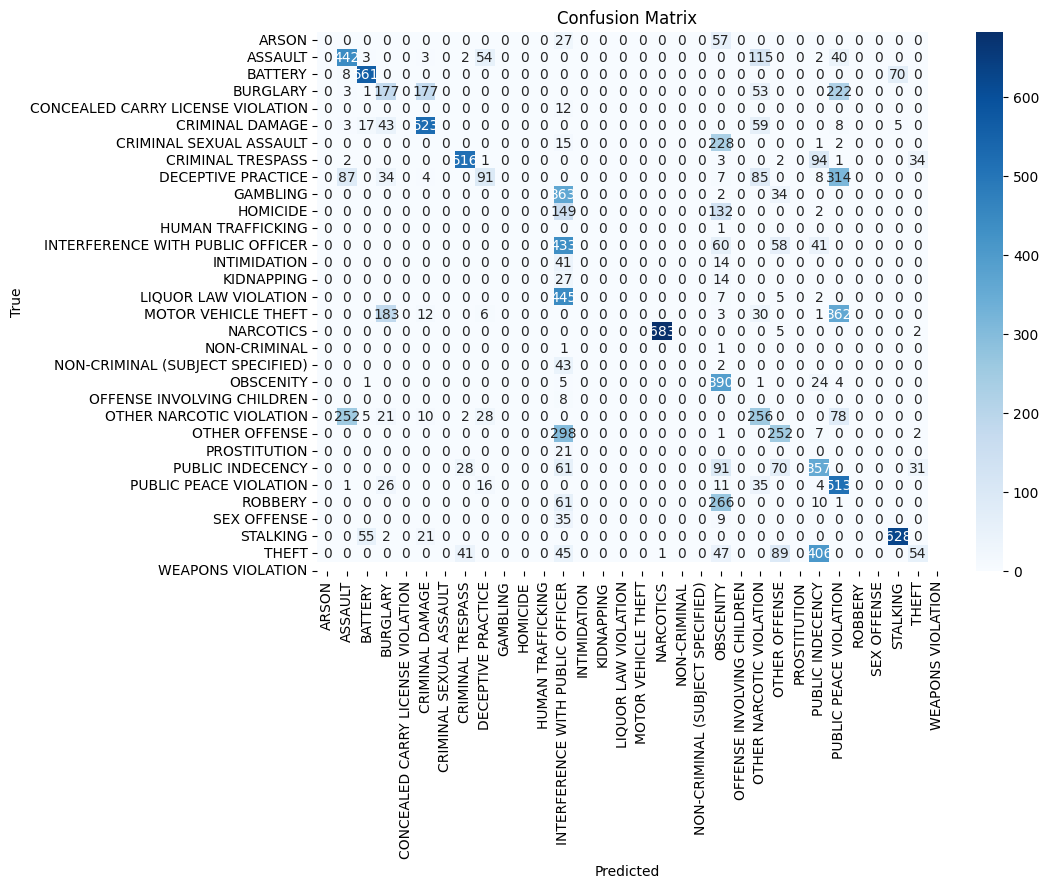

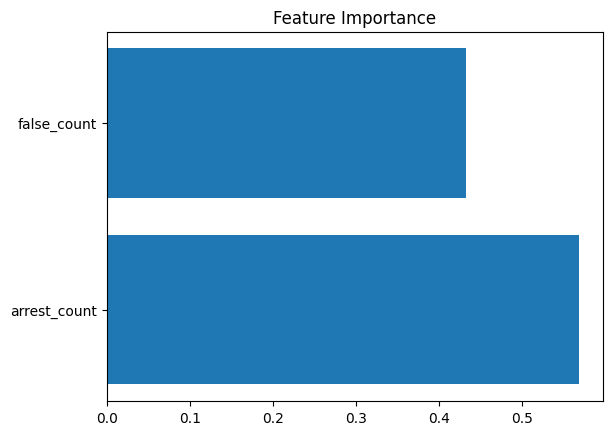

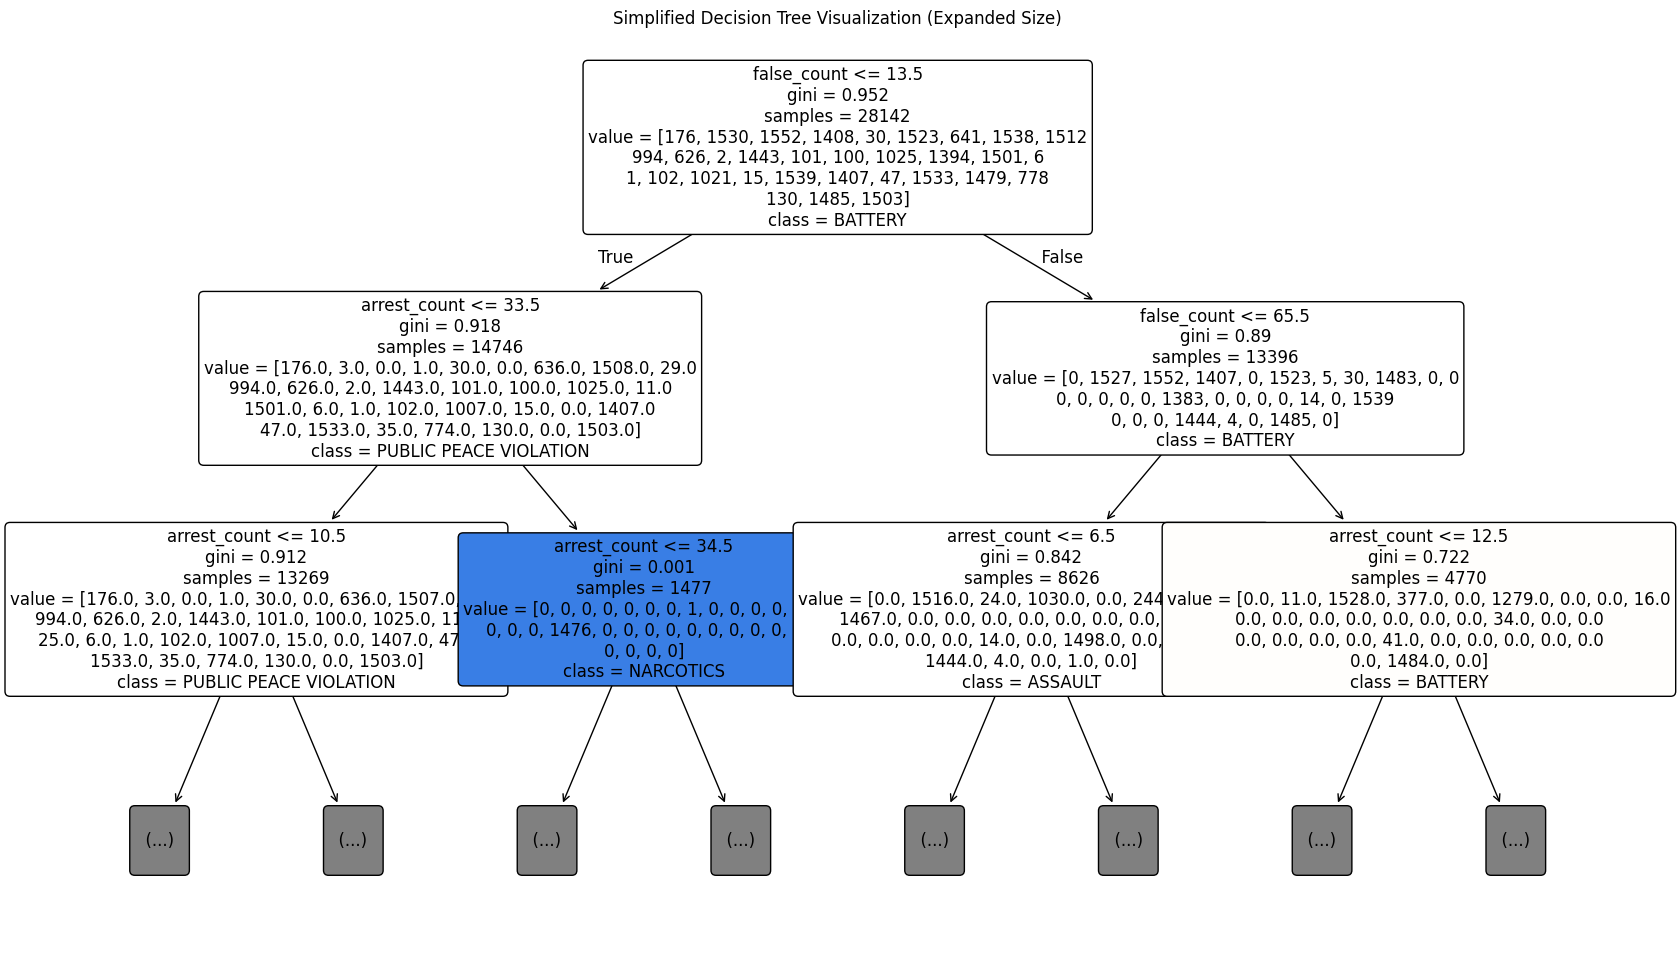

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace with the actual file path)
file_path = '/content/drive/MyDrive/CrimeDate.csv'  # Replace with your actual file path
crime_data = pd.read_csv(file_path)

# Assuming the 'date' column is in the format YYYY-MM-DD, convert it to datetime
crime_data['date'] = pd.to_datetime(crime_data['date'], errors='coerce')

# Extract the year from the 'date' column
crime_data['year'] = crime_data['date'].dt.year

# Filter the data for crimes that occurred from 2010 to 2015
filtered_data = crime_data[(crime_data['year'] >= 2010) & (crime_data['year'] <= 2015)]

# Encode categorical features (for example: 'primary_type')
le = LabelEncoder()
filtered_data['primary_type_encoded'] = le.fit_transform(filtered_data['primary_type'])

# Define the features (X) and target variable (y)
X = filtered_data[['arrest_count', 'false_count']]  # Add more features if necessary
y = filtered_data['primary_type_encoded']  # The target is the encoded crime type

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42, max_depth=5)  # Limit depth for simplicity

# Train the classifier
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Evaluate the model's performance
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Feature Importance
feature_importance = dt.feature_importances_
plt.barh(X.columns, feature_importance)
plt.title("Feature Importance")
plt.show()

# Simplified Decision Tree Visualization with increased figure size
plt.figure(figsize=(20, 12))  # Adjust the width and height for better readability
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=le.classes_,
    filled=True,
    rounded=True,
    fontsize=12,  # Slightly increase font size for clarity
    max_depth=2  # Limit tree depth for readability
)
plt.title("Simplified Decision Tree Visualization (Expanded Size)")
plt.show()

## Naive Bayesian Classification

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-28-ca8cca709aca>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarn

Accuracy: 53.54%

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.71      0.61      0.66       329
           2       0.95      0.98      0.97       338
           3       0.57      0.50      0.53       323
           4       0.81      0.76      0.78       321
           5       0.00      0.00      0.00       129
           6       0.90      0.92      0.91       339
           7       0.57      0.52      0.55       304
           8       0.19      0.66      0.29       235
           9       0.12      0.25      0.16       130
          10       0.21      0.05      0.08       291
          11       0.00      0.00      0.00        25
          12       0.00      0.00      0.00        28
          13       0.00      0.00      0.00       241
          14       0.49      0.63      0.55       289
          15       1.00      0.99      0.99       319
          18       0.00      0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



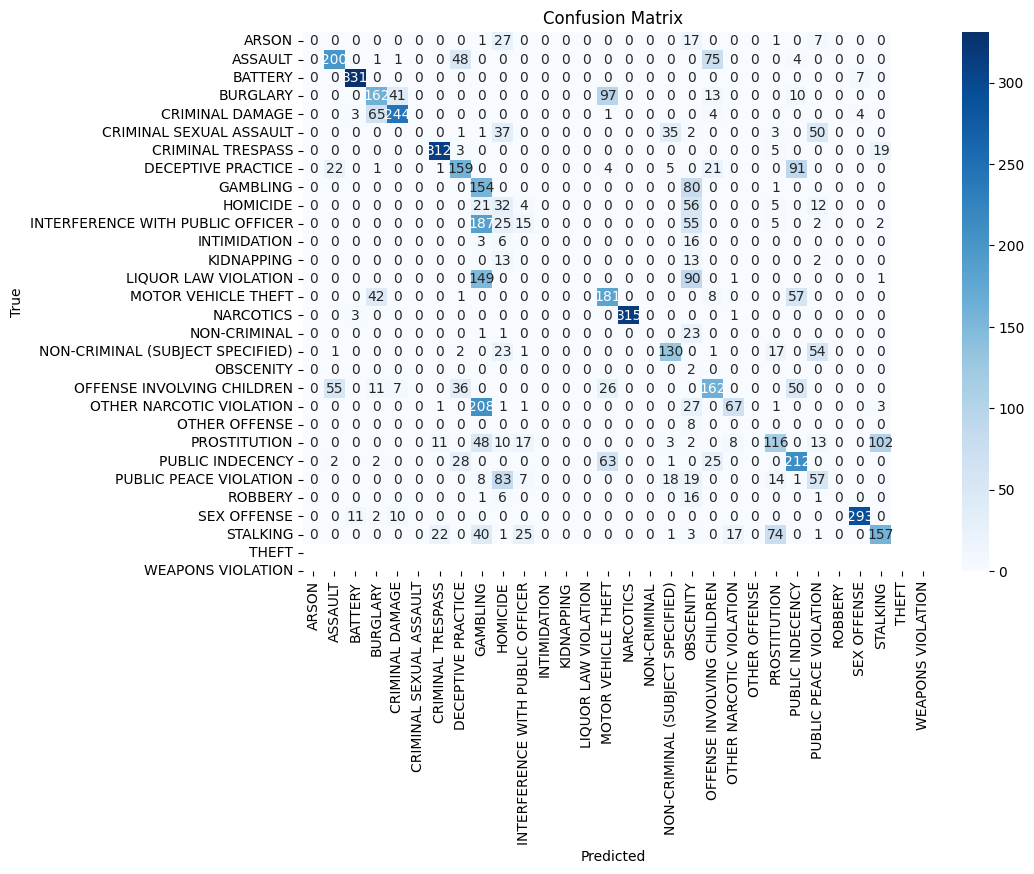

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset (replace with your file path)
file_path = '/content/drive/MyDrive/CrimeDate.csv'  # Replace with actual path
crime_data = pd.read_csv(file_path)

# Convert 'date' to datetime format
crime_data['date'] = pd.to_datetime(crime_data['date'], errors='coerce')

# Extract year and filter for the range 2010-2012
crime_data['year'] = crime_data['date'].dt.year
filtered_data = crime_data[(crime_data['year'] >= 2010) & (crime_data['year'] <= 2012)]

# Encode categorical variable (primary_type)
le = LabelEncoder()
filtered_data['primary_type_encoded'] = le.fit_transform(filtered_data['primary_type'])

# Define features (X) and target (y)
X = filtered_data[['arrest_count', 'false_count']]
y = filtered_data['primary_type_encoded']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = nb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, feature_names, class_names):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

    # Create mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))

    # Predict for grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

## SVC ( Support Vector Classifier)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-2-64a708534bd9>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['primary_type_encoded'] = le.fit_transform(filtered_data['primary_type'])


Accuracy on test set: 52.98%

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.57      0.64      0.60       661
           2       0.94      0.94      0.94       639
           3       0.37      0.33      0.35       633
           4       0.00      0.00      0.00        12
           5       0.72      0.76      0.74       658
           6       0.00      0.00      0.00       246
           7       0.88      0.86      0.87       653
           8       0.40      0.27      0.33       630
           9       0.00      0.00      0.00       399
          10       0.22      0.30      0.25       283
          11       0.00      0.00      0.00         1
          12       0.32      0.43      0.37       592
          13       0.00      0.00      0.00        55
          14       0.00      0.00      0.00        41
          15       0.24      0.69      0.35       459
          16       0.32    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


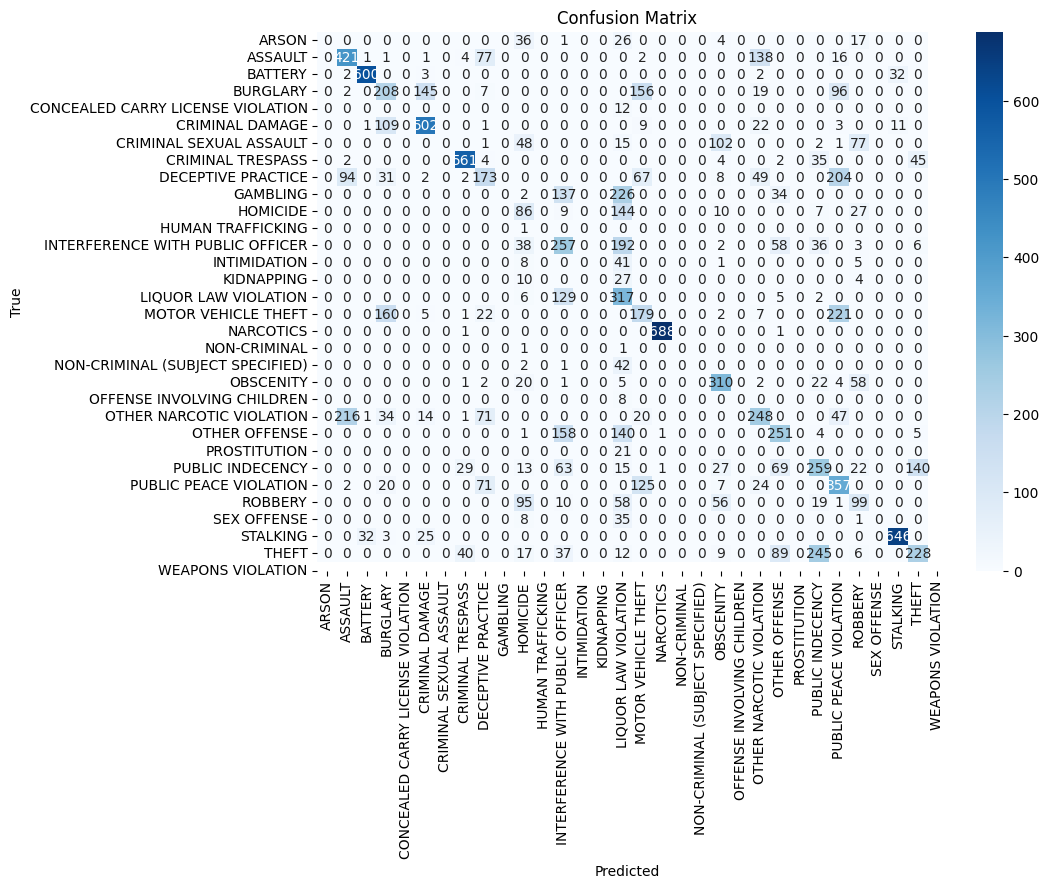

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load your dataset (replace with the actual file path)
file_path = '/content/drive/MyDrive/CrimeDate.csv'  # Replace with the actual path
crime_data = pd.read_csv(file_path)

# Assuming the 'date' column is in the format YYYY-MM-DD, convert it to datetime
crime_data['date'] = pd.to_datetime(crime_data['date'], errors='coerce')

# Extract the year from the 'date' column
crime_data['year'] = crime_data['date'].dt.year

# Filter the data for crimes that occurred from 2010 to 2015
filtered_data = crime_data[(crime_data['year'] >= 2010) & (crime_data['year'] <= 2015)]

# Encode categorical features (for example: 'primary_type')
le = LabelEncoder()
filtered_data['primary_type_encoded'] = le.fit_transform(filtered_data['primary_type'])

# Define the features (X) and target variable (y)
X = filtered_data[['arrest_count', 'false_count']]  # Add more features if necessary
y = filtered_data['primary_type_encoded']  # The target is the encoded crime type

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Support Vector Classifier (SVC)
svc = SVC(kernel='linear', random_state=42)

# Train the classifier
svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc.predict(X_test)

# Evaluate the model's performance
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Clustering

## Kmeans Clustering for analysis of crime patterns according to location from 2010 to 2014


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


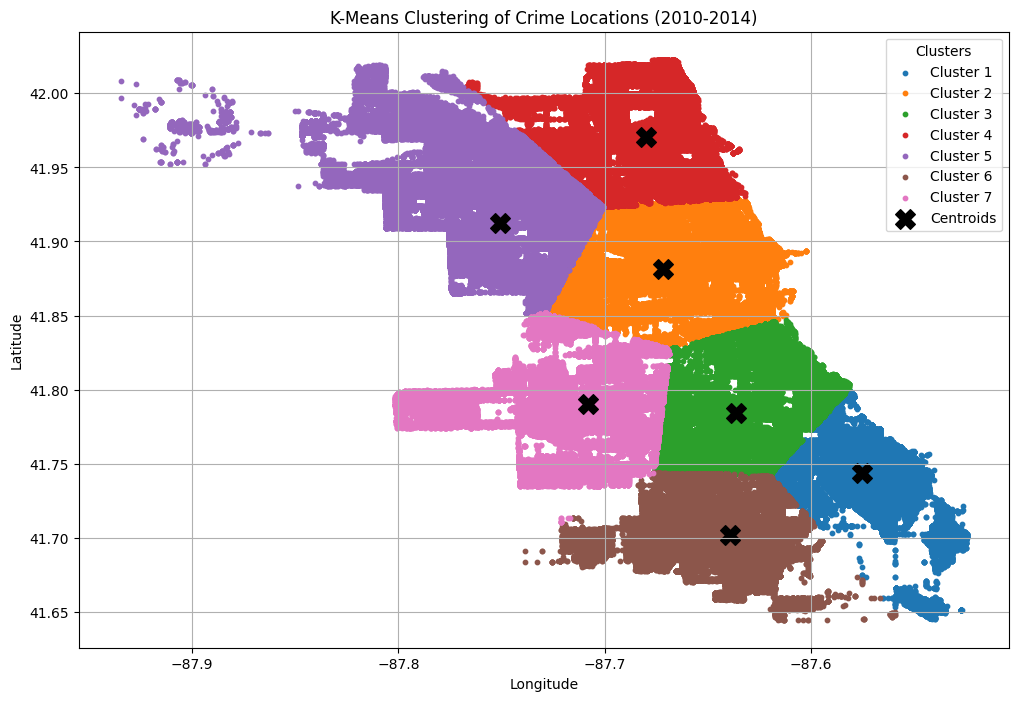

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("/content/drive/MyDrive/CrimeLocation.csv")

if {'longitude', 'latitude', 'year'}.issubset(df.columns):
    crime_data = df[(df['year'] >= 2010) & (df['year'] <= 2014)][['longitude', 'latitude']]

    crime_data = crime_data.dropna(subset=['longitude', 'latitude'])

    num_clusters = 7
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(crime_data)

    crime_data['cluster'] = kmeans.labels_

    plt.figure(figsize=(12, 8))
    for cluster in range(num_clusters):
        cluster_data = crime_data[crime_data['cluster'] == cluster]
        plt.scatter(
            cluster_data['longitude'],
            cluster_data['latitude'],
            s=10,
            label=f'Cluster {cluster + 1}'
        )

    centroids = kmeans.cluster_centers_
    centroid_points = plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        s=200,
        c='black',
        marker='X'
    )

    plt.legend(
        title='Clusters',
        loc='best',
        labels=[f'Cluster {i + 1}' for i in range(num_clusters)] + ['Centroids']
    )

    plt.title('K-Means Clustering of Crime Locations (2010-2014)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid()
    plt.show()
else:
    print("The dataset must contain 'longitude', 'latitude', and 'year' columns.")


In [10]:
!pip install scikit-learn-extra

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.0 MB/s eta 0:00:00


## Kmediods Clustering for analysis of crime patterns according to location from 2015 to 2016


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


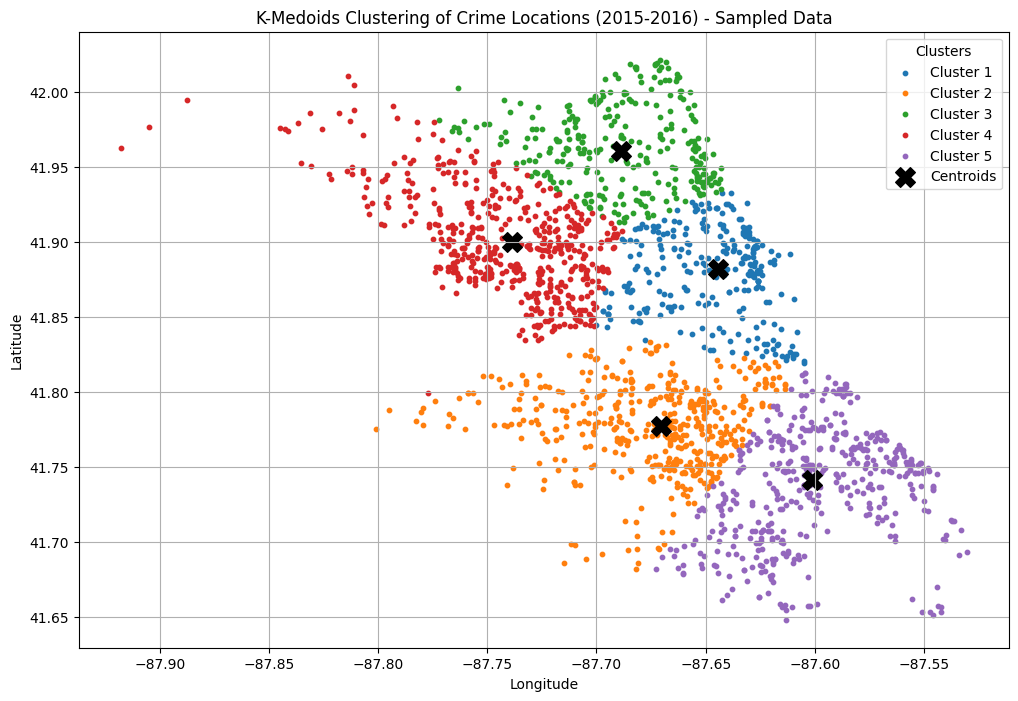

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids

df = pd.read_csv("/content/drive/MyDrive/CrimeLocation.csv")

if {'longitude', 'latitude', 'year'}.issubset(df.columns):
    crime_data = df[(df['year'] >= 2015) & (df['year'] <= 2016)][['longitude', 'latitude']]
    crime_data = crime_data.dropna(subset=['longitude', 'latitude'])

    crime_data_sample = crime_data.sample(frac=0.005, random_state=42)

    num_clusters = 5
    kmedoids = KMedoids(n_clusters=num_clusters, random_state=42, metric='euclidean')
    kmedoids.fit(crime_data_sample)
    crime_data_sample['cluster'] = kmedoids.labels_

    plt.figure(figsize=(12, 8))

    for cluster in range(num_clusters):
        cluster_data = crime_data_sample[crime_data_sample['cluster'] == cluster]
        plt.scatter(
            cluster_data['longitude'],
            cluster_data['latitude'],
            s=10,
            label=f'Cluster {cluster + 1}'
        )

    centroids = kmedoids.cluster_centers_
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        s=200,
        c='black',
        marker='X',
        label='Centroids'  # Make sure Centroids are labeled
    )

    plt.legend(
        title='Clusters',
        loc='best',
        labels=[f'Cluster {i + 1}' for i in range(num_clusters)] + ['Centroids']
    )

    plt.title('K-Medoids Clustering of Crime Locations (2015-2016) - Sampled Data')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid()
    plt.show()
else:
    print("The dataset must contain 'longitude', 'latitude', and 'year' columns.")



## DBSCAN Clustering for analysis of crime patterns according to location from 2017 to 2022

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


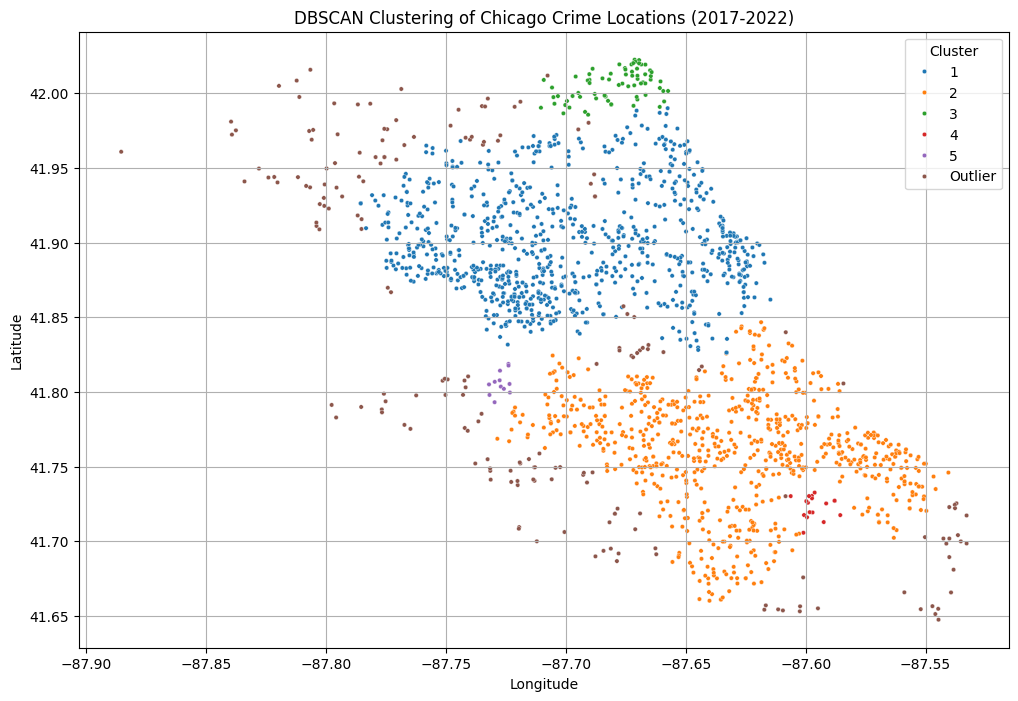

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/drive/MyDrive/CrimeLocation.csv')

if {'longitude', 'latitude', 'year'}.issubset(df.columns):

    # Filter data for the specified years
    crime_data = df[(df['year'] >= 2017) & (df['year'] <= 2022)][['longitude', 'latitude']]

    # Drop rows with missing longitude/latitude values
    crime_data = crime_data.dropna(subset=['longitude', 'latitude'])

    # Sample a fraction of the data for scalability
    crime_data_sample = crime_data.sample(frac=0.005, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(crime_data_sample)

    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=0.15, min_samples=10)
    labels = dbscan.fit_predict(X_scaled)

    # Adjust cluster labels: start from 1 instead of 0 and label -1 as "Outlier"
    crime_data_sample['Cluster'] = np.where(labels == -1, 'Outlier', labels + 1)

    # Ensure 'Outlier' appears last in the legend
    cluster_order = sorted(crime_data_sample['Cluster'].unique(), key=lambda x: (x == 'Outlier', x))

    # Plot the clusters
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        x=crime_data_sample['longitude'],
        y=crime_data_sample['latitude'],
        hue=crime_data_sample['Cluster'],
        palette='tab10',
        hue_order=cluster_order,  # Custom order for the legend
        s=10
    )
    plt.title('DBSCAN Clustering of Chicago Crime Locations (2017-2022)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(title='Cluster', loc='best')
    plt.grid()
    plt.show()

else:
    print("The dataset must contain 'longitude', 'latitude', and 'year' columns.")


In [7]:
!pip install hdbscan

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 78.2 MB/s eta 0:00:00


## HDBSCAN

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


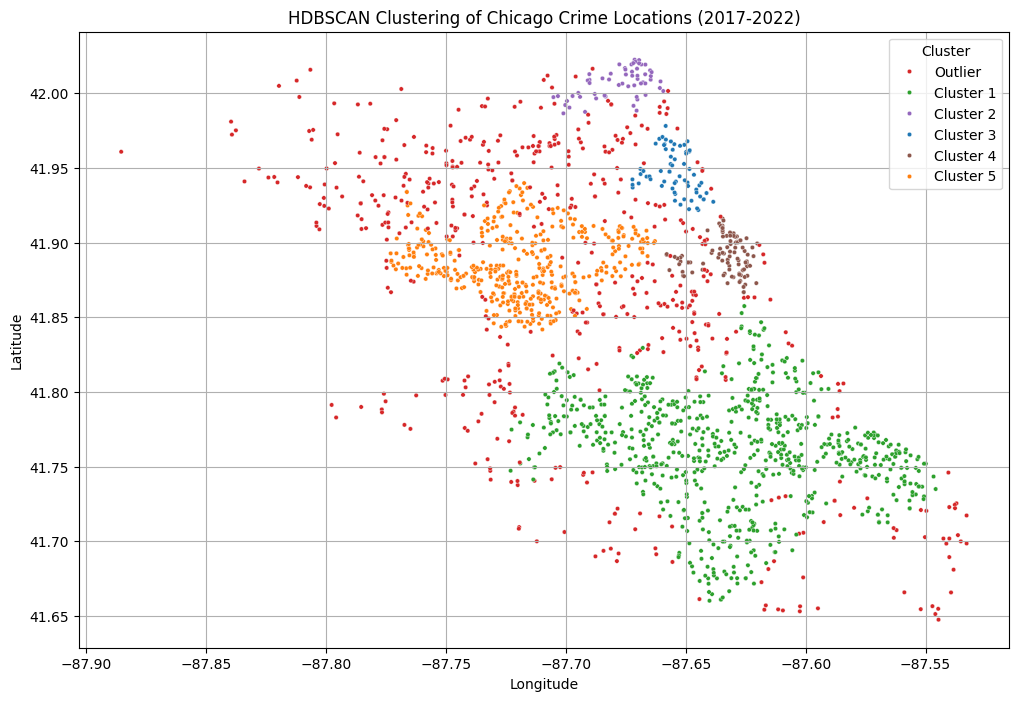

Number of clusters found: 6


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hdbscan
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CrimeLocation.csv')

if {'longitude', 'latitude', 'year'}.issubset(df.columns):

    # Filter data for the years 2017 to 2022
    crime_data = df[(df['year'] >= 2017) & (df['year'] <= 2022)][['longitude', 'latitude']]

    # Drop rows with missing values
    crime_data = crime_data.dropna(subset=['longitude', 'latitude'])

    # Optionally, take a smaller sample for faster clustering
    crime_data_sample = crime_data.sample(frac=0.005, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(crime_data_sample)

    # Apply HDBSCAN clustering
    clusterer = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=50, gen_min_span_tree=True)
    labels = clusterer.fit_predict(X_scaled)

    # Adjust labels: change -1 (noise) to 'Outlier' and other clusters to start from 1
    labels_adjusted = labels + 1  # Shift cluster labels to start from 1

    # Set the noise points (label -1) to 'Outlier'
    labels_adjusted[labels == -1] = -1  # Keep -1 for outliers

    # Add the adjusted cluster labels to the dataframe
    crime_data_sample['Cluster'] = labels_adjusted

    # Plot the clusters
    plt.figure(figsize=(12, 8))
    scatter = sns.scatterplot(
        x=crime_data_sample['longitude'],
        y=crime_data_sample['latitude'],
        hue=crime_data_sample['Cluster'].map(lambda x: 'Outlier' if x == -1 else f'Cluster {x}'),
        palette='tab10',
        s=10
    )

    # Customizing legend order
    handles, labels = scatter.get_legend_handles_labels()
    # Move "Outlier" to the end of the legend
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda x: (x[0] != 'Outlier', x[0])))

    scatter.legend(handles, labels, title='Cluster', loc='best')

    plt.title('HDBSCAN Clustering of Chicago Crime Locations (2017-2022)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid()
    plt.show()

    # Optionally, print the number of clusters
    num_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude -1 (noise)
    print(f"Number of clusters found: {num_clusters}")

else:
    print("The dataset must contain 'longitude', 'latitude', and 'year' columns.")


# Pyspark Implementation for Big Data

## FPGrowth Algorithm using Pyspark

In [5]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.ml.fpm import FPGrowth
from pyspark.ml.feature import StringIndexer
from pyspark.sql import Row
from pyspark.sql.functions import col
import time

# Initialize Spark session
spark = SparkSession.builder.appName("FrequentItemsets").getOrCreate()

# Load dataset
dataset = pd.read_csv("/content/drive/MyDrive/CrimeDate.csv")

# Preprocess dataset
dataset = dataset[["date", "primary_type"]].dropna()

# Group by 'date' and aggregate the 'primary_type' values into lists of crimes per date
transaction_data = dataset.groupby("date")["primary_type"].apply(list).reset_index(name='Crimes')

# Convert the list of crimes into a Spark DataFrame
rdd = spark.sparkContext.parallelize(transaction_data["Crimes"].tolist())
transactions_df = rdd.map(lambda x: Row(items=x)).toDF()

# Initialize the FPGrowth algorithm
fp_growth = FPGrowth(itemsCol="items", minSupport=0.99, minConfidence=0.5)

# Start the timer
start_time = time.time()

# Fit the FPGrowth model
model = fp_growth.fit(transactions_df)

# Get frequent itemsets
frequent_itemsets = model.freqItemsets

# End the timer
end_time = time.time()

# Show results
print("Length of Frequent Itemsets is:")
print(frequent_itemsets.count())  # Count number of frequent itemsets
print("The frequent itemsets are:")
frequent_itemsets.show(truncate=False)

# Time taken for the algorithm
print("Time taken to find frequent itemsets by FPGrowth Algorithm:", end_time - start_time, "seconds")

# Stop the Spark session
spark.stop()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Length of Frequent Itemsets is:
103
The frequent itemsets are:
+-------------------------------------------------------+----+
|items                                                  |freq|
+-------------------------------------------------------+----+
|[ASSAULT]                                              |7831|
|[ASSAULT, NARCOTICS]                                   |7828|
|[ASSAULT, NARCOTICS, BATTERY]                          |7828|
|[ASSAULT, BATTERY]                                     |7831|
|[THEFT]                                                |7821|
|[THEFT, ASSAULT]                                       |7817|
|[THEFT, ASSAULT, NARCOTICS]                            |7815|
|[THEFT, ASSAULT, NARCOTICS, BATTERY]                   |7815|
|[THEFT, ASSAULT, BATTERY]                              |7817|
|[THEFT, NARCOTICS]                                     |7819|
|[THEFT, NARCOTICS, BATTERY]                            |7819|
|[THEFT, WEAPONS VIOLATION]                            

## Naive Bayesian Classification implementation using Pyspark


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 18.66%
Predicted  0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  \
Actual                                                                        
0.0         150    88     0     0    33     6     0     1    58     0     0   
1.0         100    89     0     0    23     2     0     0    88     0     0   
2.0           3     0   143     1     0     0    84     0     0    72     0   
3.0           0     0     0    33     0     0     0     0     0     0     0   
4.0          21    38     0     0    78    92     0    24    67     0    22   
5.0           0     0     0     0    66   116     0    46     1     0    94   
6.0           1     0    58    41     0     0   122     0     0    34     0   
7.0           0     0     0     0     6    29     0   105     0     0    48   
8.0          64    58     0     0    45    47     0    13    62     0     4   
9.0           5     6   102    50     0     0    93     0     0    28     0   
10.0          7     4     0     0  

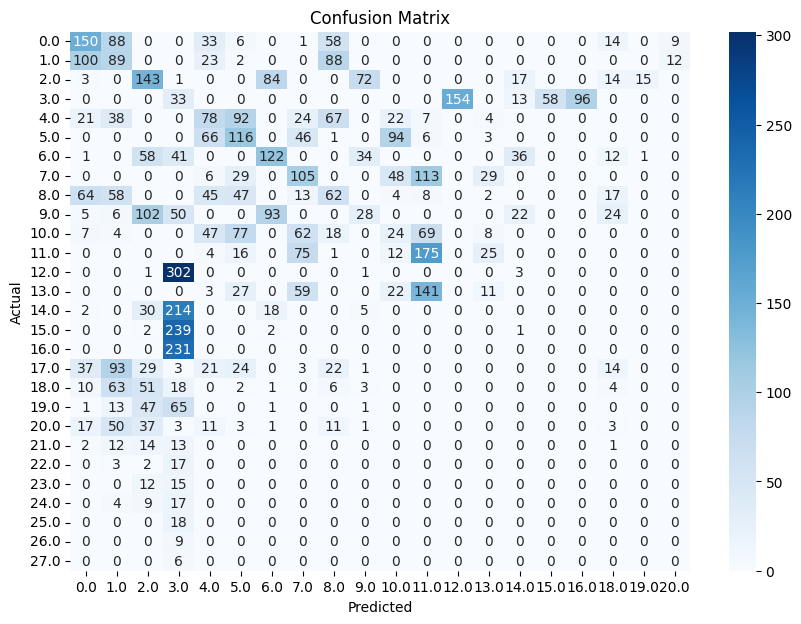

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, year, to_date
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize Spark session
spark = SparkSession.builder.appName("CrimeClassification").getOrCreate()

# Load dataset into a Spark DataFrame
file_path = "/content/drive/MyDrive/CrimeDate.csv"  # Replace with the actual path
crime_data = spark.read.csv(file_path, header=True, inferSchema=True)

# Convert 'date' column to datetime and extract year
crime_data = crime_data.withColumn("date", to_date(col("date"), "yyyy-MM-dd"))
crime_data = crime_data.withColumn("year", year(col("date")))

# Filter for the years 2010 to 2012
filtered_data = crime_data.filter((col("year") >= 2010) & (col("year") <= 2012))

# Encode the 'primary_type' column into numeric labels
indexer = StringIndexer(inputCol="primary_type", outputCol="primary_type_encoded")
filtered_data = indexer.fit(filtered_data).transform(filtered_data)

# Define features and target
assembler = VectorAssembler(inputCols=["arrest_count", "false_count"], outputCol="features")
final_data = assembler.transform(filtered_data).select("features", "primary_type_encoded")

# Split the dataset into training and testing sets
train_data, test_data = final_data.randomSplit([0.7, 0.3], seed=42)

# Initialize and train the Naive Bayes model
nb = NaiveBayes(featuresCol="features", labelCol="primary_type_encoded")
nb_model = nb.fit(train_data)

# Make predictions
predictions = nb_model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="primary_type_encoded", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification Report
predictions_pandas = predictions.select("primary_type_encoded", "prediction").toPandas()
print(pd.crosstab(predictions_pandas["primary_type_encoded"], predictions_pandas["prediction"], rownames=["Actual"], colnames=["Predicted"]))

# Confusion Matrix Visualization
cm = pd.crosstab(predictions_pandas["primary_type_encoded"], predictions_pandas["prediction"], rownames=["Actual"], colnames=["Predicted"])
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Stop the Spark session
spark.stop()

## Agnes Clustering implementation using pyspark


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


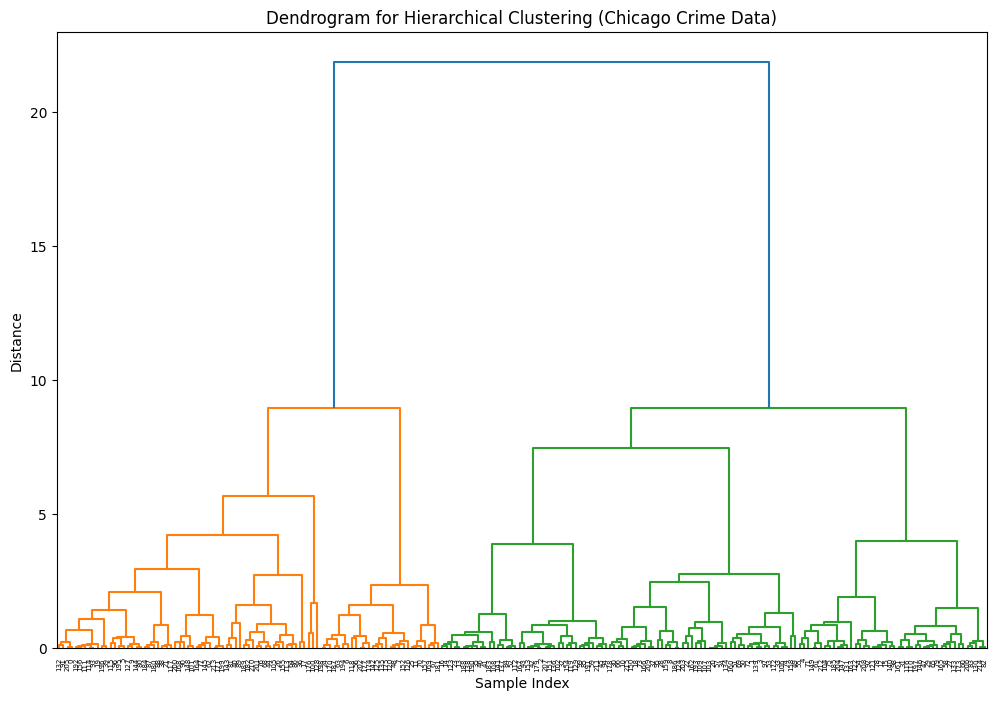

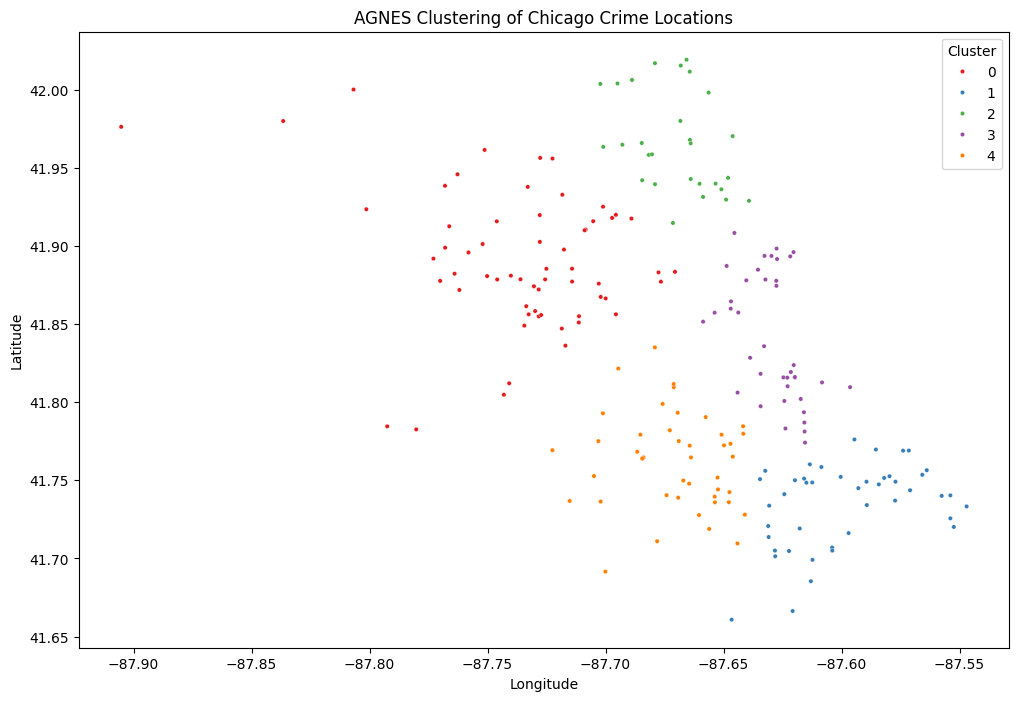

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("Chicago Crime Clustering") \
    .getOrCreate()

# Load the dataset
df = spark.read.csv('/content/drive/MyDrive/CrimeLocation.csv', header=True, inferSchema=True)

# Ensure required columns exist
if {'longitude', 'latitude', 'year'}.issubset(df.columns):
    # Filter data for years 2017 and 2018
    crime_data = df.filter((col('year') >= 2017) & (col('year') <= 2018)) \
                   .select('longitude', 'latitude') \
                   .dropna()

    # Sample the data (adjust fraction as needed)
    crime_data_sample = crime_data.sample(withReplacement=False, fraction=0.0005, seed=42)

    # Convert Spark DataFrame to Pandas DataFrame for clustering
    crime_data_pandas = crime_data_sample.toPandas()

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(crime_data_pandas[['longitude', 'latitude']])

    # Perform hierarchical clustering and plot the dendrogram
    plt.figure(figsize=(12, 8))
    linked = linkage(X_scaled, method='ward')
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
    plt.title('Dendrogram for Hierarchical Clustering (Chicago Crime Data)')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

    # Choose an optimal number of clusters based on the dendrogram
    optimal_clusters = 5

    # Assign clusters using Agglomerative Clustering
    from sklearn.cluster import AgglomerativeClustering
    cluster = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
    crime_data_pandas['Cluster'] = cluster.fit_predict(X_scaled)

    # Scatter plot of the clusters
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        x=crime_data_pandas['longitude'],
        y=crime_data_pandas['latitude'],
        hue=crime_data_pandas['Cluster'],
        palette='Set1',
        s=10
    )
    plt.title('AGNES Clustering of Chicago Crime Locations')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(title='Cluster')
    plt.show()

else:
    print("The dataset must contain 'longitude', 'latitude', and 'year' columns.")

# Stop Spark session
spark.stop()